### Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
pd.set_option('display.max_rows', None)

# Tests
from scipy.stats.contingency import association # Cramér's V test
from scipy.stats import chi2_contingency # Chi-square test

import statsmodels.api as sm # statistics

In [2]:
#Import data
data = pd.read_csv('amz_uk_price_prediction_dataset.csv')
data.head(5)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [3]:
# General Selection
cat = data.select_dtypes(exclude="number")
num = data.select_dtypes(include="number")

## Part 1: Analyzing Best-Seller Trends Across Product Categories
**Objective**: Understand the relationship between product categories and their best-seller status.

### Crosstab Analysis

In [4]:
crosstab = pd.crosstab(data['category'], data['isBestSeller'])
crosstab['proportion'] = crosstab[True]/crosstab[False]


# categories where being best-seller is more prevalent:
crosstab_result = crosstab.sort_values(by=True,ascending=False).head(10)
crosstab_result

isBestSeller,False,True,proportion
category,,,
Grocery,9008,556,0.061723
Health & Personal Care,9017,552,0.061218
Baby,14709,341,0.023183
Sports & Outdoors,835935,330,0.000395
Power & Hand Tools,8353,306,0.036634
Beauty,19010,302,0.015886
Pet Supplies,9152,285,0.031141
Arts & Crafts,9319,230,0.024681
Women,17559,213,0.012131


### Statistical Tests

In [5]:
# Chi-square test
chi2_stats, chi2_pvalue, _, _ = chi2_contingency(crosstab_result.head())
chi2_pvalue

0.0

In [6]:
# Cramér's V teste
cross_C = crosstab_result.copy()
cross_C = cross_C.drop(columns='proportion')
association(cross_C, method='cramer')

0.16999680408904638

**Interpreation Chi-square**: informs about the independence of two categorical values
- p-value < 0.05: significan association between the categorical values

**Interpreation Crámer's V**: measure strength of association
- 0.16: this means low association

<Figure size 2000x1800 with 0 Axes>

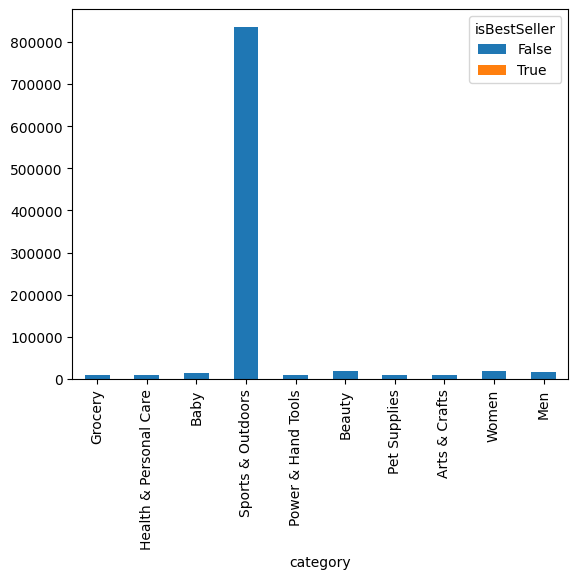

In [7]:
# Plotting a stacked bar chart for the 'crosstab_result' data
plt.figure(figsize=(20, 18))
cross_C.plot(kind='bar', stacked=True)
plt.show()

## Part 2: Exploring Product Prices and Ratings Across Categories and Brands
**Objective**: Investigate how different product categories influence product prices.

In [46]:
Q1 = data.price.quantile(0.25)
Q2 = data.price.quantile(0.5)
Q3 = data.price.quantile(0.75)

print(f"Q1: {Q1},\nQ2: {Q2},\nQ3: {Q3}")

Q1: 9.99,
Q2: 19.09,
Q3: 45.99


In [9]:
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers

In [10]:
df=data.copy()

In [11]:
data_series = df['price'] # series of the price column to remove outliers after
outliers = tukeys_test_outliers(data_series) # apply function to identify outliers
df_clean = df.drop(outliers.index) # remove outliers and reset index without outliers
df_clean.head(5)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [ ]:
# Violin Plots

In [13]:
cat2 = df_clean.category.value_counts(ascending=False).head(20).index
top20 = df_clean[df_clean.category.isin(cat2)]

/var/folders/d9/b5sfz3_12tv_8rtt32lkmw8h0000gn/T/ipykernel_34146/2239748539.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=top20, x="category", y="price", palette="coolwarm")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Handmade Home & Kitchen Products'),
  Text(1, 0, 'Sports & Outdoors'),
  Text(2, 0, 'Handmade Gifts'),
  Text(3, 0, 'Fragrances'),
  Text(4, 0, 'Skin Care'),
  Text(5, 0, 'Birthday Gifts'),
  Text(6, 0, 'Handmade Kitchen & Dining'),
  Text(7, 0, 'Bath & Body'),
  Text(8, 0, 'Manicure & Pedicure Products'),
  Text(9, 0, 'Beauty'),
  Text(10, 0, 'Handmade Artwork'),
  Text(11, 0, 'Make-up'),
  Text(12, 0, 'Baby'),
  Text(13, 0, 'Handmade Clothing, Shoes & Accessories'),
  Text(14, 0, 'Handmade Home Décor'),
  Text(15, 0, 'Men'),
  Text(16, 0, 'Luggage and travel gear'),
  Text(17, 0, 'Handmade Jewellery'),
  Text(18, 0, 'Women'),
  Text(19, 0, 'Hair Care')])

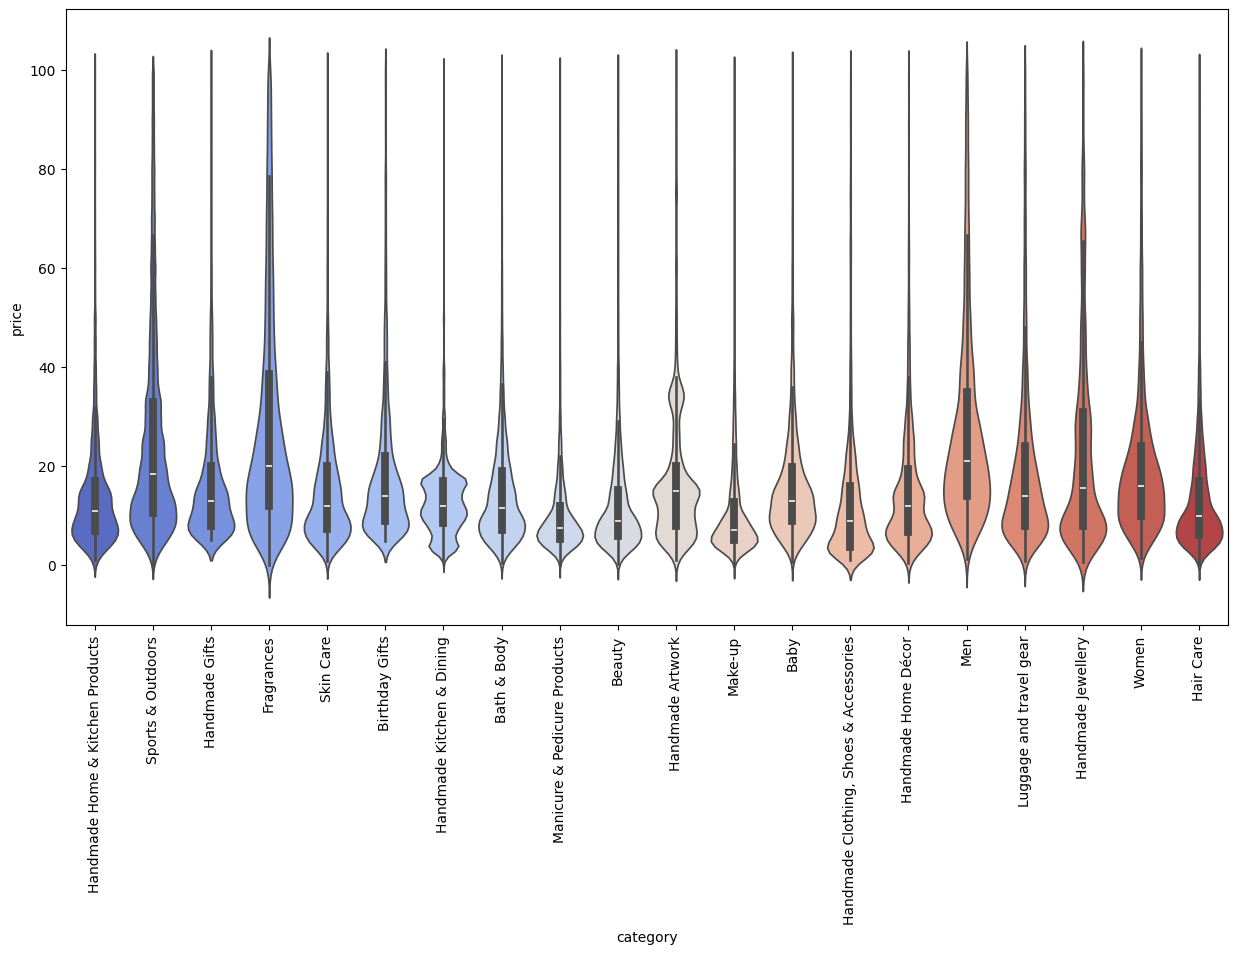

In [14]:
plt.figure(figsize=(15, 8))
sns.violinplot(data=top20, x="category", y="price", palette="coolwarm")
plt.xticks(rotation=90)

In [15]:
median = df_clean.groupby('category')['price'].median().sort_values(ascending=False).head(10)
median

category
Desktop PCs               74.00
Boxing Shoes              69.79
Tablets                   69.00
Graphics Cards            68.54
Motherboards              67.92
Made in Italy Handmade    64.00
Digital Frames            63.90
Streaming Clients         62.68
Golf Shoes                62.39
Ski Helmets               61.33
Name: price, dtype: float64

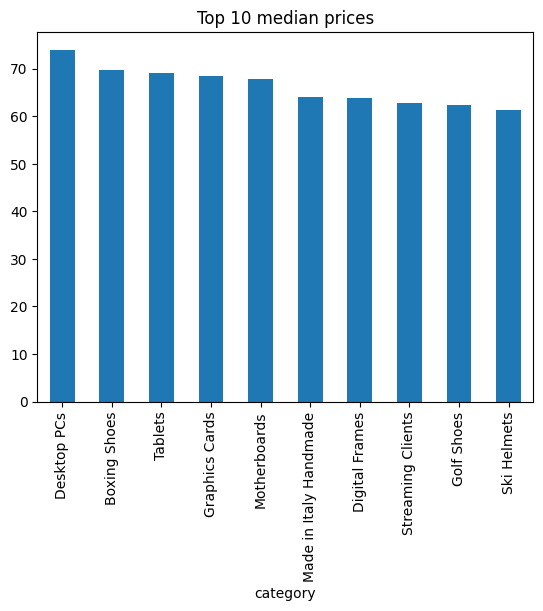

In [16]:
median.plot(kind='bar')
plt.title('Top 10 median prices')
plt.show()

In [ ]:
# Bar Charts

In [21]:
top_10 = df_clean.category.value_counts(ascending=False).head(10).index
top10 = df_clean[df_clean.category.isin(top_10)]

In [23]:
mean_prices = df_clean[df_clean.category.isin(top_10)].groupby('category')['price'].mean().sort_values(ascending=False)

/var/folders/d9/b5sfz3_12tv_8rtt32lkmw8h0000gn/T/ipykernel_34146/1235491501.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10, y=mean_prices, palette='viridis')


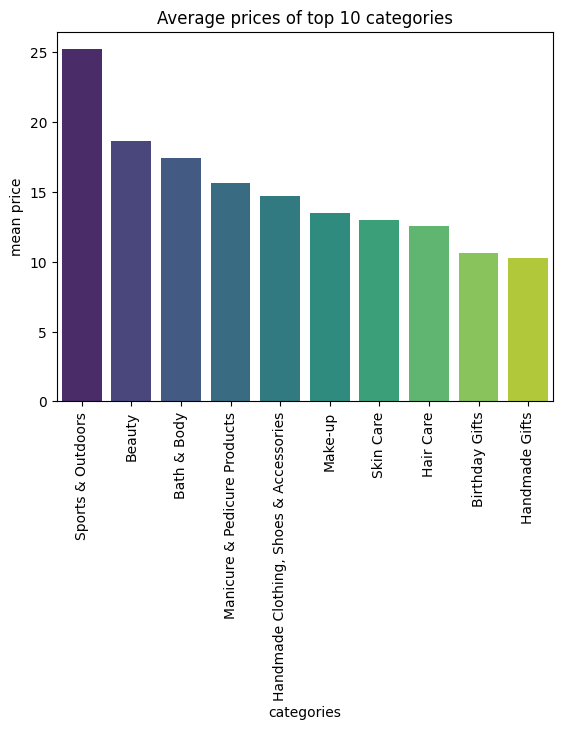

In [32]:
sns.barplot(x=top_10, y=mean_prices, palette='viridis')
plt.title('Average prices of top 10 categories')
plt.xticks(rotation=90)
plt.ylabel('mean price')
plt.xlabel('categories')
plt.show()

In [ ]:
# Box Plots

In [39]:
df_reviews = data.category.value_counts(ascending=False).head(10).index
top10_stars = data[data.category.isin(df_reviews)]

# Remove the 0 stars
top10_stars = top10_stars[top10_stars.stars > 0]
top10_stars.head(5)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
82163,89483,B07DLGZ828,Neutrade GoPro 3M Sticky Pads Double Sided Adh...,4.2,3116,6.49,False,0,Sports & Outdoors
82164,89484,B09HGZHXJT,"WOLFANG Action Camera 4K 20MP GA100, Waterproo...",4.2,2594,49.99,False,0,Sports & Outdoors
82165,89485,B08G2HBBB6,GoPro HERO9 - Waterproof Sports Camera with Fr...,4.5,5161,199.00,True,0,Sports & Outdoors
82166,89486,B09D15SFMQ,GoPro HERO10 Black - Waterproof Action Camera ...,4.4,2467,249.99,False,0,Sports & Outdoors
82167,89487,B08LD4VXGL,FitStill 60M/196FT Waterproof Case for Go Pro ...,4.5,9879,16.98,True,0,Sports & Outdoors


/var/folders/d9/b5sfz3_12tv_8rtt32lkmw8h0000gn/T/ipykernel_34146/3764545671.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=top10_stars, x="category", y="stars", palette="coolwarm")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Sports & Outdoors'),
  Text(1, 0, 'Fragrances'),
  Text(2, 0, 'Skin Care'),
  Text(3, 0, 'Birthday Gifts'),
  Text(4, 0, 'Bath & Body'),
  Text(5, 0, 'Manicure & Pedicure Products'),
  Text(6, 0, 'Beauty'),
  Text(7, 0, 'Make-up'),
  Text(8, 0, 'Handmade Clothing, Shoes & Accessories'),
  Text(9, 0, 'Hair Care')])

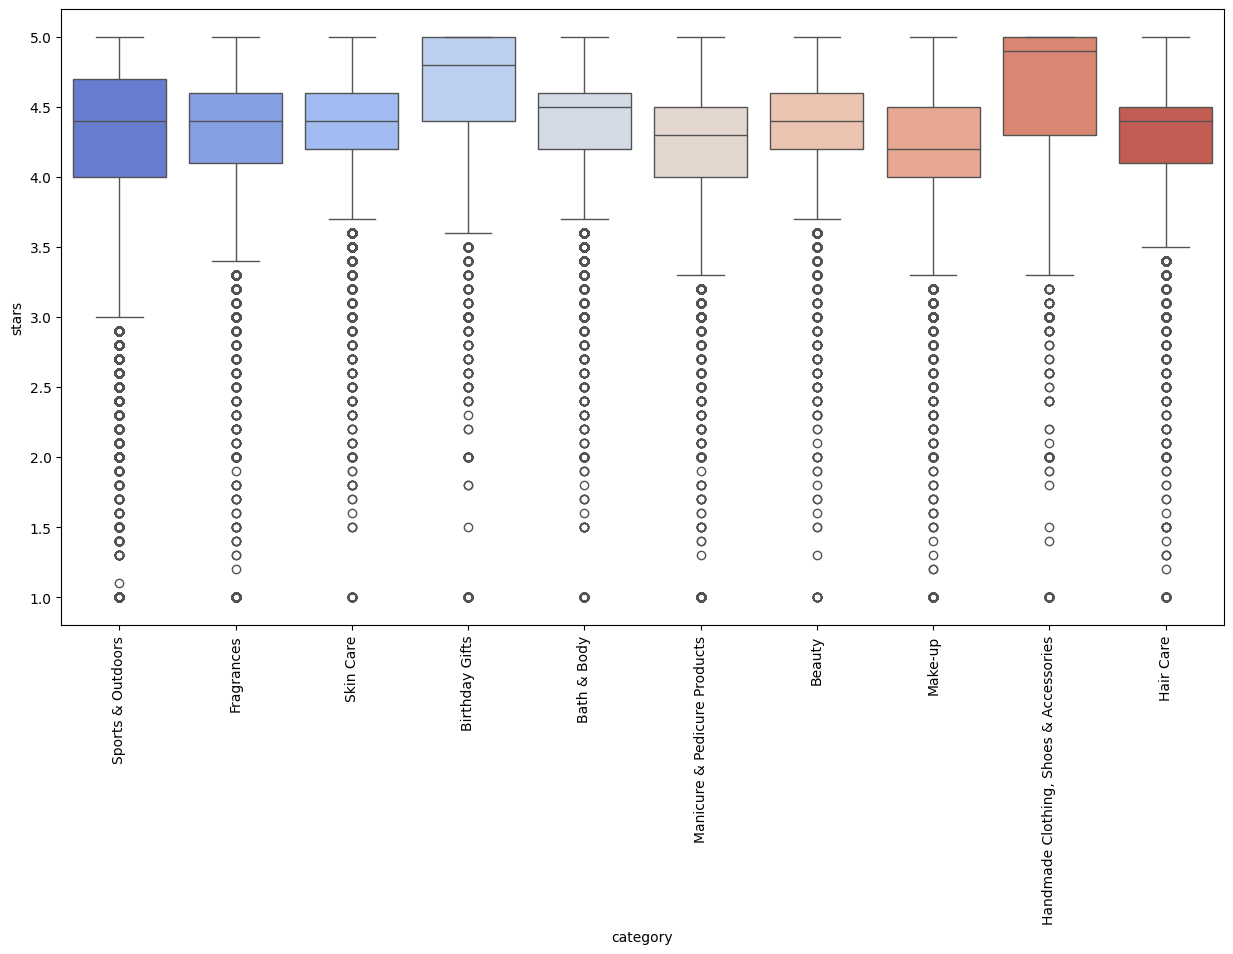

In [40]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=top10_stars, x="category", y="stars", palette="coolwarm")
plt.xticks(rotation=90)

In [41]:
median_stars = data.groupby('category')['stars'].median().sort_values(ascending=False).head(10)
median_stars

category
Computer Memory                 4.7
Hobbies                         4.6
Beer, Wine & Spirits            4.6
Laptop Accessories              4.6
Kids' Play Figures              4.6
Building & Construction Toys    4.6
CPUs                            4.6
Office Paper Products           4.6
Luxury Food & Drink             4.6
Camera & Photo Accessories      4.5
Name: stars, dtype: float64

## Part 3: Investigating the Interplay Between Product Prices and Ratings
**Objective**: Analyze how product ratings (stars) correlate with product prices.

In [47]:
num.head(5)

,uid,stars,reviews,price,boughtInLastMonth
0,1,4.7,15308,21.99,0
1,2,4.7,98099,23.99,0
2,3,4.7,15308,21.99,0
3,4,4.7,7205,31.99,0
4,5,4.6,1881,17.99,0


In [53]:
# Pearson correlation WITH outliers
data["price"].corr(data["stars"], method='pearson')

-0.1249067326214869

In [54]:
# Spearman correlation WITH outliers
data["price"].corr(data["stars"], method='spearman')

-0.13316425462433937

In [51]:
# Pearson correlation WITHOUT outliers
df_clean["price"].corr(df_clean["stars"], method='pearson')

-0.07767299878181352

In [52]:
# Spearman correlation WITHOUT outliers
df_clean["price"].corr(df_clean["stars"], method='spearman')

-0.06679697280768393

CONCLUSION: There is not a strong correlation with either of the methods

In [ ]:
## Visualization

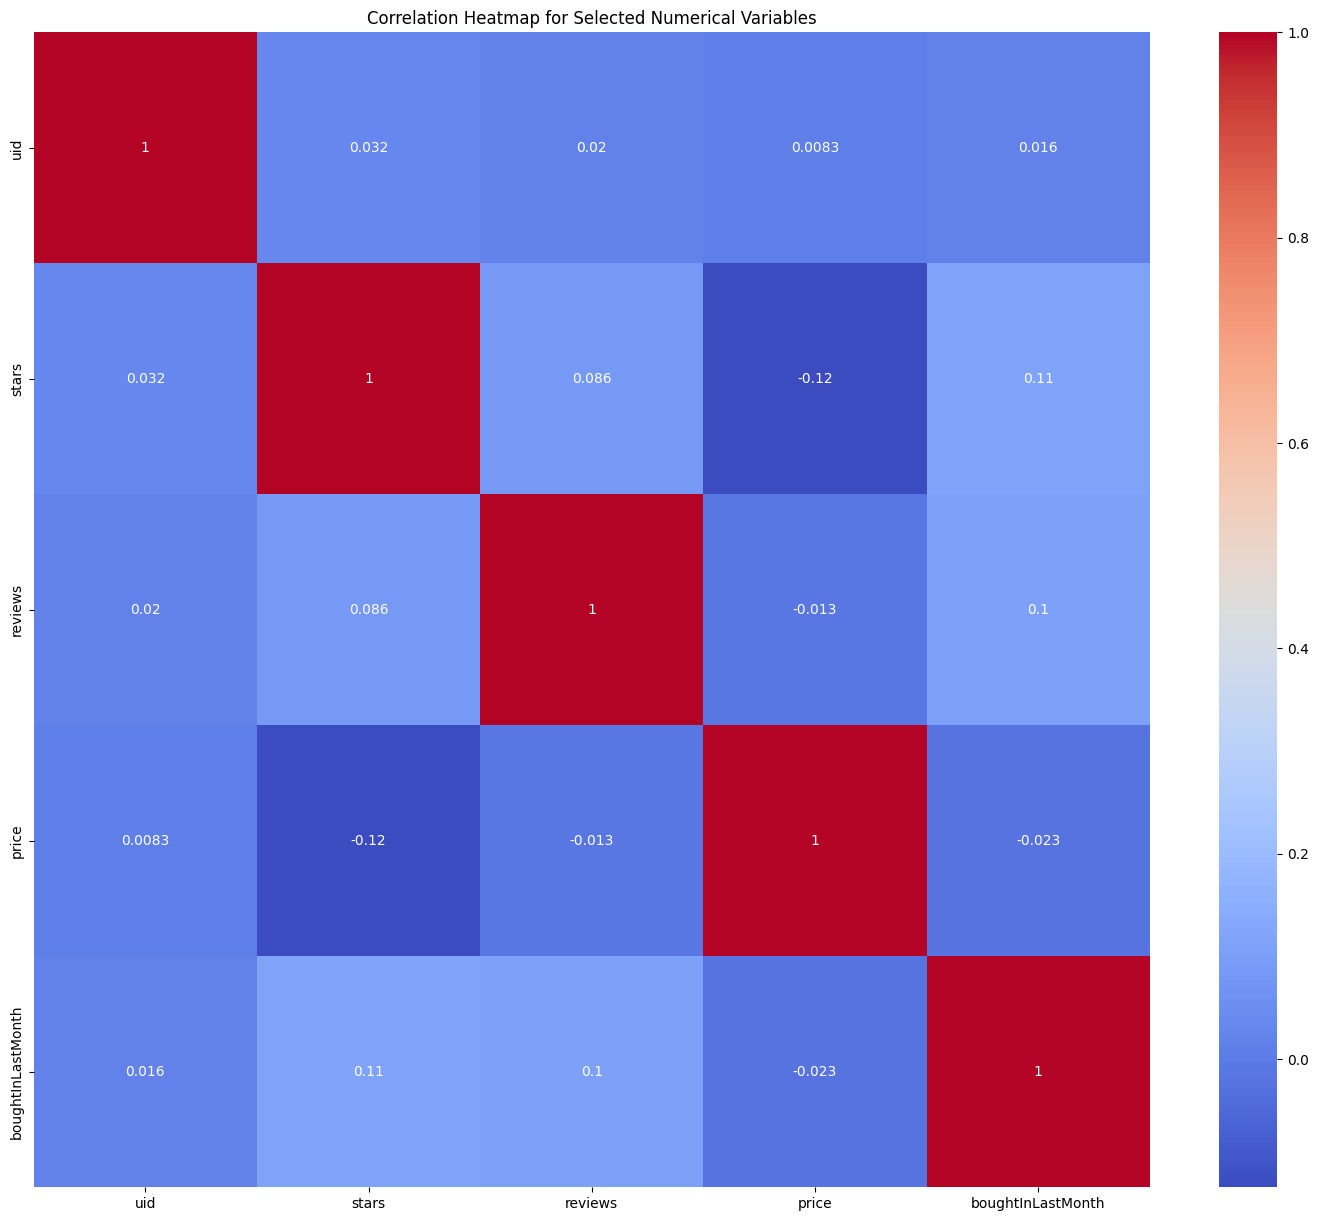

In [55]:
correlation_matrix = num.corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(18, 15))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

<Axes: xlabel='stars', ylabel='price'>

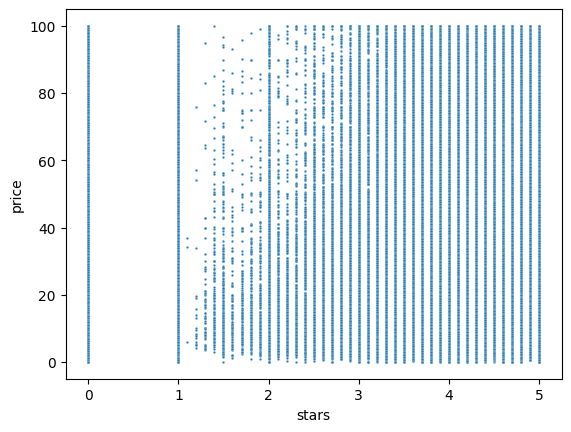

In [59]:
sns.scatterplot(data=df_clean, x="stars", y="price", s=3)

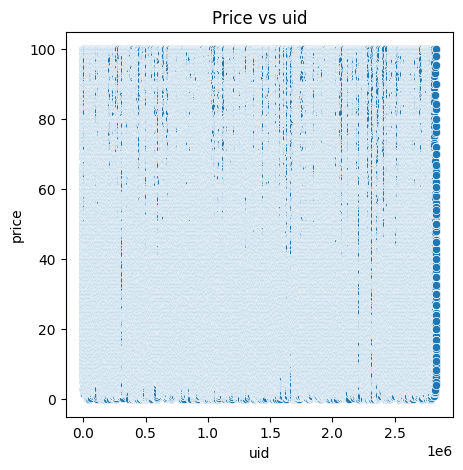

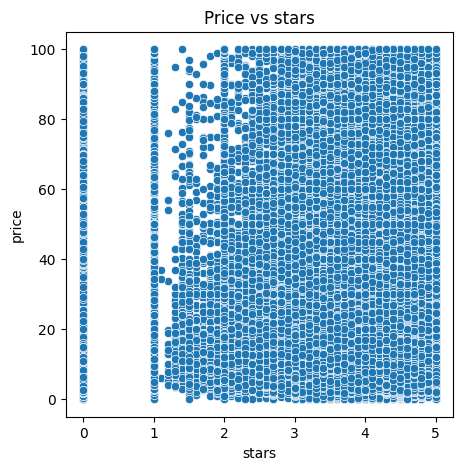

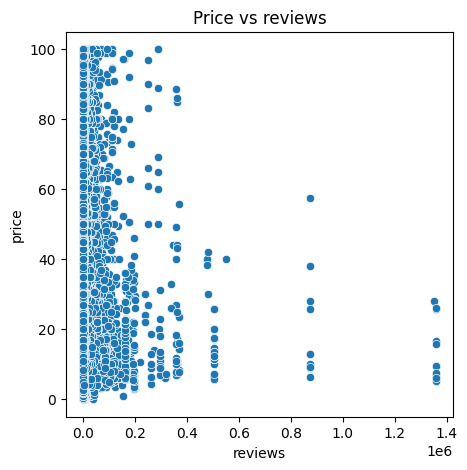

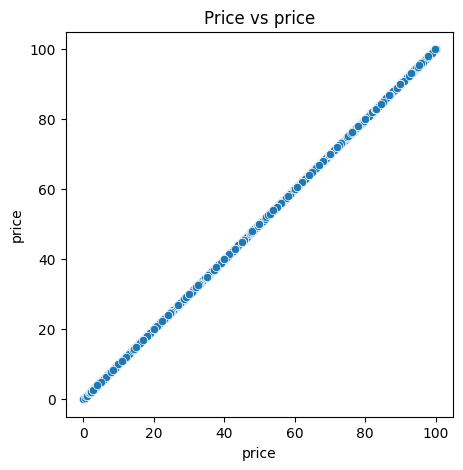

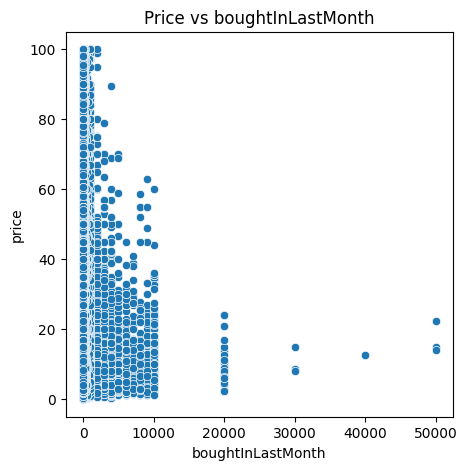

In [61]:
# Individual scatter plots for each numerical column against 'price'
for col in num.columns:
    plt.figure(figsize=(5, 5))
    plt.title('Price vs ' + col)
    sns.scatterplot(data=df_clean, x=col, y='price')
    plt.show()

In [62]:
import statsmodels.api as sm

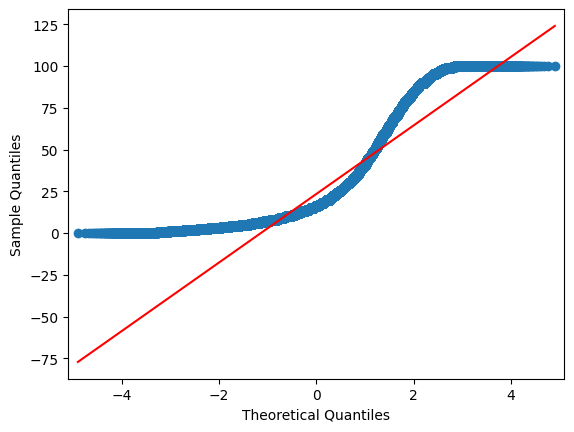

In [64]:
# Generating a Q-Q plot for 'price' to check if its distribution follows a normal distribution
sm.qqplot(df_clean['price'], line='s');
plt.show()

<Axes: xlabel='price', ylabel='Count'>

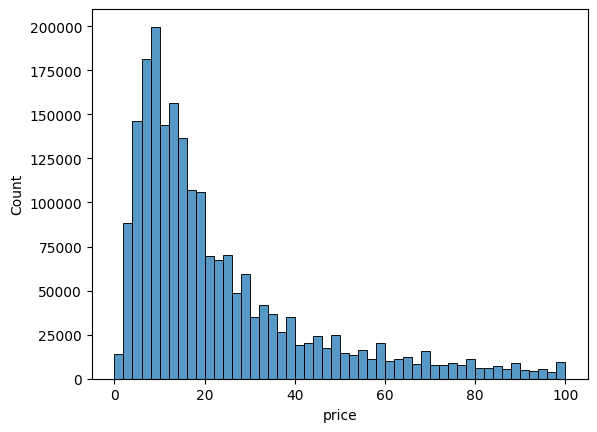

In [65]:
sns.histplot(df_clean['price'], bins=50)

We can see that the distribution is not normal, but positively skewed